In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import utils
import pandas as pd

<Axes: ylabel='Density'>

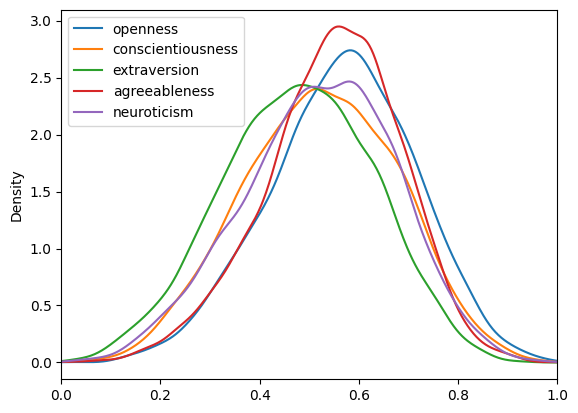

In [40]:
annotation_path = '../annotation_training.pkl'
gt = pickle.load( open( annotation_path, "rb" ), encoding='latin1' )
neuroticism = list(gt['neuroticism'].values())
extraversion = list(gt['extraversion'].values())
agreeableness = list(gt['agreeableness'].values())
conscientiousness = list(gt['conscientiousness'].values())
openness = list(gt['openness'].values())

df = pd.DataFrame({'openness':openness,'conscientiousness':conscientiousness,'extraversion': extraversion,'agreeableness':agreeableness,'neuroticism': neuroticism})
df.plot(kind='density',xlim=(0,1))

In [ ]:
#Video klasörlerini oku preprocesing yap dump et
annotation_path = '../annotation_training.pkl'
for i in range(1,76):
    folder_path = '../train/training80_' + str(i).zfill(2) + '/'
    utils.get_training_data(folder_path,annotation_path)
# Dump edilmiş dosyaları oku

training_set_data = []
for i in range(1,76):
    with open('train_dat/training80_'+str(i).zfill(2)+'.dat', 'rb') as f:
        training_set_data += pickle.load(f,encoding='latin1')

In [11]:
#Video klasörlerini oku preprocesing yap dump et
annotation_path = '../annotation_validation.pkl'

for i in range(1,26):
    folder_path = '../val/validation80_' + str(i).zfill(2) + '/'
    utils.get_validation_data(folder_path,annotation_path)
# Dump edilmiş dosyaları oku

validation_set_data = []
for i in range(1,26):
    with open('val_dat/validation80_'+str(i).zfill(2)+'.dat', 'rb') as f:
        validation_set_data += pickle.load(f,encoding='latin1')

In [104]:

x_train = np.array([x[0] for x in training_set_data])
np.save('x_train.npy',x_train)
y_train = np.array([x[1] for x in training_set_data])
np.save('y_train.npy',y_train)
x_val = np.array([x[0] for x in validation_set_data])
np.save('x_val.npy',x_val)
y_val = np.array([x[1] for x in validation_set_data])
np.save('y_val.npy',y_val)

In [16]:
# Artık train datasını böyle kullanabilirsin
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

In [3]:
import tensorflow_hub as hub
model_vggish = hub.load('https://kaggle.com/models/google/vggish/frameworks/TensorFlow2/variations/vggish/versions/1')

2023-12-10 22:18:36.510552: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 22:18:36.838863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-10 22:18:36.839586: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
from tqdm import tqdm
embeddings = []
for i in tqdm(range(len(x_train))):
    embeddings.append(np.reshape(model_vggish(x_train[i,:]),(1,640)))
embeddings = np.array(embeddings)
np.save('x_train_embeddings.npy',embeddings)

100%|██████████| 5995/5995 [00:44<00:00, 135.51it/s]


In [18]:
embeddings = []
for i in tqdm(range(len(x_val))):
    embeddings.append(np.reshape(model_vggish(x_val[i,:]),(1,640)))
embeddings = np.array(embeddings)
np.save('x_val_embeddings.npy',embeddings)

  0%|          | 0/1999 [00:00<?, ?it/s]

100%|██████████| 1999/1999 [00:14<00:00, 134.28it/s]
